<a href="https://colab.research.google.com/github/yurikobyzev/yurikobyzev/blob/main/XRAYCHECK_grounding_dino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/CINEMATOGRAF

/content/drive/MyDrive/CINEMATOGRAF


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/CINEMATOGRAF


In [ ]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/drive/MyDrive/CINEMATOGRAF/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [ ]:
%cd {HOME}
#!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .

/content/drive/MyDrive/CINEMATOGRAF
/content/drive/MyDrive/CINEMATOGRAF/GroundingDINO
  Preparing metadata (setup.py) ... done


In [ ]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/drive/MyDrive/CINEMATOGRAF/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content/drive/MyDrive/CINEMATOGRAF
mkdir: cannot create directory ‘/content/drive/MyDrive/CINEMATOGRAF/weights’: File exists
/content/drive/MyDrive/CINEMATOGRAF/weights


In [ ]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/drive/MyDrive/CINEMATOGRAF/weights/groundingdino_swint_ogc.pth ; exist: True


In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/drive/MyDrive/CINEMATOGRAF/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [ ]:
%cd /content/drive/MyDrive/XRAYCHECK

/content/drive/MyDrive/XRAYCHECK


0 man 0.7499558 [0.53727645 0.54299283 0.78030026 0.8200074 ]
1 pistol 0.6978123 [0.4213039  0.49996394 0.24351656 0.10803229]
2 box 0.36156762 [0.85901254 0.9525404  0.27398962 0.09089655]
3 pedestal 0.4208989 [0.49519697 0.94663525 0.49957395 0.04457956]
4 key 0.37718493 [0.3409878  0.6087505  0.07451123 0.01950818]
5 glasses 0.32353204 [0.55639774 0.21031126 0.15797572 0.03203961]
6 book 0.3062187 [0.14319181 0.91908073 0.27898803 0.02521444]
7 chain 0.5088589 [0.54665786 0.2853449  0.18647167 0.08901473]


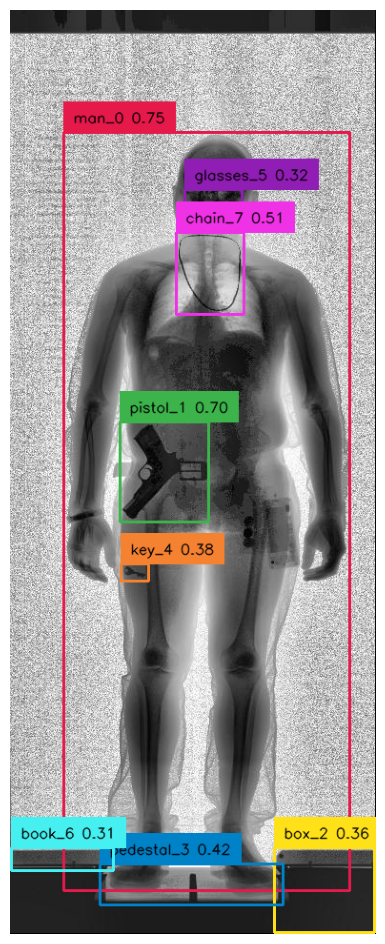

In [ ]:
import os
import supervision as sv
import torch

IMAGE_NAME = "2017-09-30T09-34-26_101_processed.jpg"
IMAGE_PATH = '/content/drive/MyDrive/XRAYCHECK/ph_final/test/2017-09-30T09-34-26_101_processed.jpg'
IMAGE_PATH = '/content/drive/MyDrive/XRAYCHECK/ph_final/pistolet/select/2017-10-07T10-44-25_286_pistolet.jpg'


TEXT_PROMPT = "man.chain.watch.gadget.phone.belt.metal product"
TEXT_PROMPT = "belt.watch.man.glasses"
TEXT_PROMPT = "pistol,chain,man,key,box,belt,pedestal,glasses,wallet,book"
BOX_TRESHOLD = 0.30
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)



boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

bb=[]
lo=[]
ph=[]
i=-1


for box,conf,label in zip(boxes,logits,phrases):


  if label!='':
    i+=1

    bb.append(box.numpy())
    lo.append(conf.numpy())

    tbox = box[None, :]
    tconf = conf[None]


    #annotated_frame = annotate(image_source=image_source, boxes=tbox, logits=tconf, phrases=label)
    print(i,label,conf.numpy(),box.numpy())


    #%matplotlib inline
    #sv.plot_image(annotated_frame, (12, 12))
    ph.append(label+'_'+str(i))
bb = torch.tensor(bb)
#lo=torch.tensor(lo)


annotated_frame = annotate(image_source=image_source, boxes=bb, logits=lo, phrases=ph)

%matplotlib inline
sv.plot_image(annotated_frame, (12, 12))